# Prosper Loan Data Exploration

## Preliminary wrangling

-this document explores prosper loan data which consists 113937 rows and 81 columns

In [149]:
#importing all needed packages to do our exploration
import numpy as np
import pandas as pd
import seaborn as sb
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [150]:
df = pd.read_csv('./prosperLoanData.csv')

# Exploring and cleaning our dataset
- there are many columns that are not useful in our EDA so we will remove it
- changing some columns variable dtypes to suitable dtypes

In [151]:
#exploring how many rows and columns do we have
print(df.shape)
df.head()

(113937, 81)


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [20]:
df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [15]:
df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [16]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [25]:
df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [158]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [5]:
df.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [14]:
df.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

In [16]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [155]:
df.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

In [109]:
df.Investors.nunique()

751

In [152]:
#choosing specific columns that we will explore which are related to the amount of loan
my_df = df.loc[: , ['ListingCreationDate','Term','LoanStatus','ClosedDate','BorrowerAPR',
                    'BorrowerRate', 'LenderYield','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)',
                    'BorrowerState','EmploymentStatus','IsBorrowerHomeowner','IncomeRange', 'StatedMonthlyIncome','LoanCurrentDaysDelinquent',
                    'LoanOriginalAmount','MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]
print(my_df.shape)
my_df.head()

(113937, 20)


ListingCreationDate  Term LoanStatus           ClosedDate  \
0  2007-08-26 19:09:29.263000000    36  Completed  2009-08-14 00:00:00   
1  2014-02-27 08:28:07.900000000    36    Current                  NaN   
2  2007-01-05 15:00:47.090000000    36  Completed  2009-12-17 00:00:00   
3  2012-10-22 11:02:35.010000000    36    Current                  NaN   
4  2013-09-14 18:38:39.097000000    36    Current                  NaN   

   BorrowerAPR  BorrowerRate  LenderYield ProsperRating (Alpha)  ProsperScore  \
0      0.16516        0.1580       0.1380                   NaN           NaN   
1      0.12016        0.0920       0.0820                     A           7.0   
2      0.28269        0.2750       0.2400                   NaN           NaN   
3      0.12528        0.0974       0.0874                     A           9.0   
4      0.24614        0.2085       0.1985                     D           4.0   

   ListingCategory (numeric) BorrowerState EmploymentStatus  \
0                          0            CO    Self-employed   
1                          2            CO         Employed   
2                          0            GA    Not available   
3                         16            GA         Employed   
4                          2            MN         Employed   

   IsBorrowerHomeowner     IncomeRange  StatedMonthlyIncome  \
0                 True  $25,000-49,999          3083.333333   
1                False  $50,000-74,999          6125.000000   
2                False   Not displayed          2083.333333   
3                 True  $25,000-49,999          2875.000000   
4                 True       $100,000+          9583.333333   

   LoanCurrentDaysDelinquent  LoanOriginalAmount  MonthlyLoanPayment  \
0                          0                9425              330.43   
1                          0               10000              318.93   
2                          0                3001              123.32   
3                          0               10000              321.45   
4                          0               15000              563.97   

   LP_ServiceFees  Investors  
0         -133.18        258  
1            0.00          1  
2          -24.20         41  
3         -108.01        158  
4          -60.27         20

In [144]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  IncomeRange                11

In [153]:
#removing the outlier scores
my_df.drop(my_df.index[my_df['ProsperScore'] > 10], inplace = True)

In [154]:
#creating orderd categories for income range and alphabetic prosperRating
ordinal_vars = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','75,000-99,999','$100,000+'],
                 'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA']}
for var in ordinal_vars:
    order_var = pd.api.types.CategoricalDtype(ordered=True , categories = ordinal_vars[var])
    my_df[var] = my_df[var].astype(order_var)

In [155]:
#changing listing category column name
my_df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'} , inplace = True)

In [156]:
#changing datatypes to category for all categories columns
cat_columns = ['BorrowerState','ListingCategory','EmploymentStatus','Term']
for column in cat_columns:
    my_df[column] = my_df[column].astype('category')

In [157]:
#changing dtype of the date columns from object to datetime
dates = ['ListingCreationDate','ClosedDate']
for date in dates:
    my_df[date] = pd.to_datetime(my_df[date])

my_df['listing year'] = my_df['ListingCreationDate'].dt.year
my_df['closed year'] = my_df['ClosedDate'].dt.year

In [146]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107731 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        107731 non-null  object 
 1   Term                       107731 non-null  int64  
 2   LoanStatus                 107731 non-null  object 
 3   ClosedDate                 53404 non-null   object 
 4   BorrowerAPR                107706 non-null  float64
 5   BorrowerRate               107731 non-null  float64
 6   LenderYield                107731 non-null  float64
 7   ProsperRating (Alpha)      78647 non-null   object 
 8   ProsperScore               78647 non-null   float64
 9   ListingCategory (numeric)  107731 non-null  int64  
 10  BorrowerState              102216 non-null  object 
 11  EmploymentStatus           105476 non-null  object 
 12  IsBorrowerHomeowner        107731 non-null  bool   
 13  IncomeRange                10

In [116]:
my_df.isna().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory                  0
BorrowerState                 5515
EmploymentStatus              2255
IsBorrowerHomeowner              0
IncomeRange                      0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
creation_year                    0
dtype: int64

### Structure of my dataset
- after cleaning unuseful  columns we will have 21 columns
- we have missing data in (ClosedDat - ProsperRating - ProsperScore - BorrowerState - EmploymentStatus - BorrowerRate)

### What is/are the main feature(s) of interest in your dataset?

I'm interesting in figuring out what features make people ask for loans and what makes them fails of repaying the loan

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that (employment status - income range - StatedMonthlyIncome - Term -  ListingCategory) affect people need of loan as i guess that most borrowers should be an empolyed and with medium income range that he also have a well monthly income to afford paying loan monthly installments , also i think the tall terms will encourge people to borrowr as long it will make ot monthly installment less that the short terms loans , not only this but having a lower risk category encourge the investors to give the loan. 

#### important functions and variables to avoid the repetitve code

In [16]:
#creating a function for sizing the figure
def figure_size(x,y):
    return plt.figure(figsize=[x,y])

In [17]:
#creating a function to order my column due to value counts
def ordermycol(col):
    order = my_df[col].value_counts().index
    return order

In [18]:
#creating a function to plot horizontal countplots
def h_count(y):
    return sb.countplot(data = my_df , y=y, order = ordermycol(y) ,color=base_color)

In [19]:
#creating a function to plot horizontal countplots
def v_count(x):
    return sb.countplot(data = my_df , x=x , order = ordermycol(x),color=base_color)

In [20]:
base_color = sb.color_palette()[0]

# Univariant Exploration

### 1 - Employment status count for borrowers

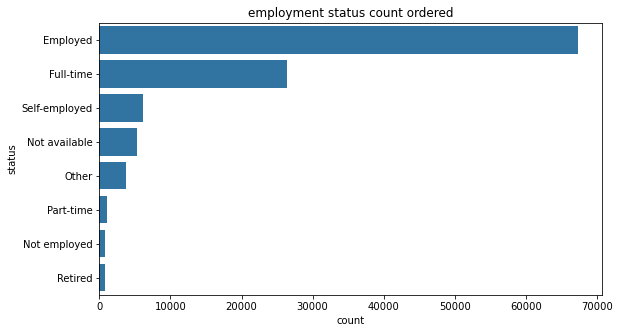

In [85]:

figure_size(5,9)
h_count(y = 'EmploymentStatus')
plt.xlabel('count')
plt.ylabel('status')
plt.title('employment status count ordered');

we can notice here that most of our borrowers are between employed and full-time employment state

### 2-states distribuiton

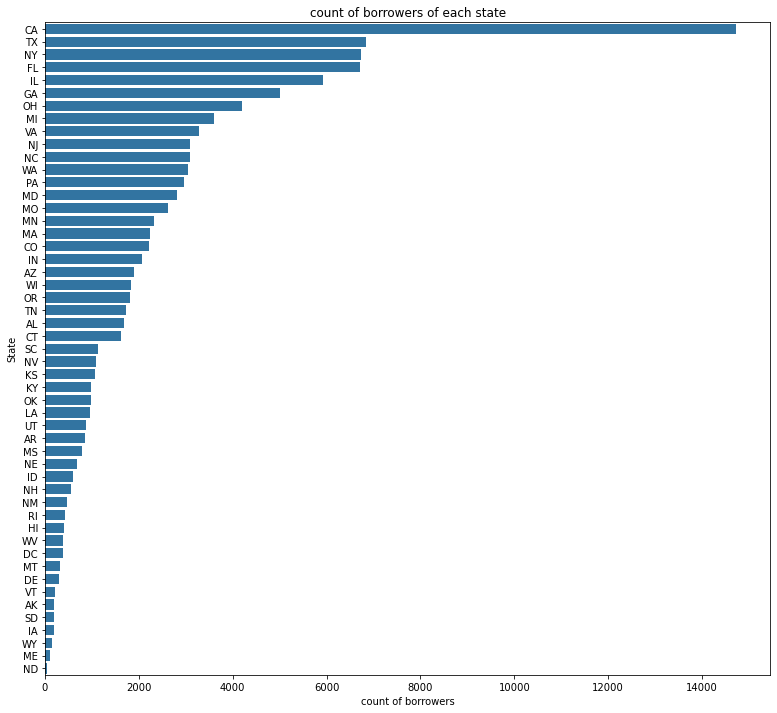

In [128]:
figure_size(13,12)
h_count(y='BorrowerState');
plt.xlabel('count of borrowers')
plt.ylabel('State')
plt.title('count of borrowers of each state');

- CA  state has the highest count of borrowers
- NY and FL have a similar count of borrowers
- ND state has the least count of borrowers

### 3-  distributions of Income Range

In [121]:
n_incomeranges = my_df['IncomeRange'].value_counts().sum()
maxincome_perc = my_df['IncomeRange'].value_counts()[0]/n_incomeranges
print(maxincome_perc)

0.2825421066027717


In [126]:
perc_ticks = np.arange(0,0.3,0.05)
name_ticks = ['{:0.2f}'.format(v) for v in perc_ticks]

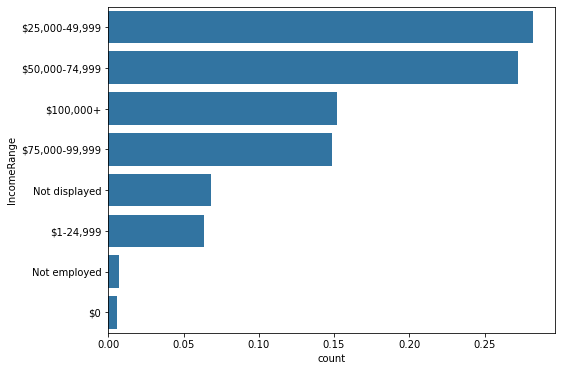

In [133]:
figure_size(8,6)
h_count('IncomeRange');
plt.xticks(perc_ticks * n_incomeranges , name_ticks);

- the most common income range is between 25k and 49,999 USD
- more than 50% of the borrowers have income range between 25k and 74,999 USD

### 4- list category counts

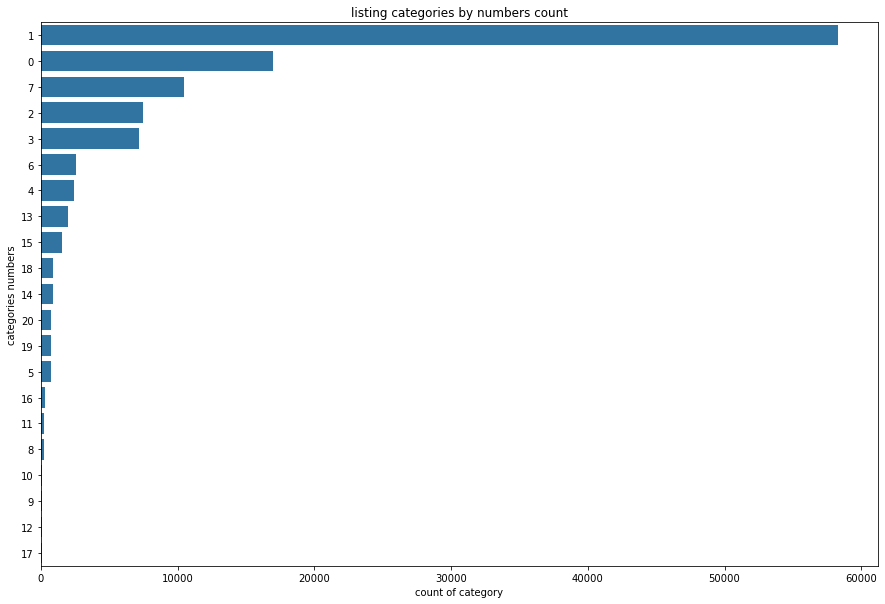

In [146]:
figure_size(15,10)
h_count('ListingCategory');
plt.xlabel('count of category')
plt.ylabel('categories numbers')
plt.title('listing categories by numbers count');

the numbers of the listing category means : 
(0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans)
we understand that the most category listing is <b>Debt consolidation</b> then <b>unobvious reasons for (0-7)</b> after this comes <b>Home Improvement</b>


### 5- Loans Terms distribution

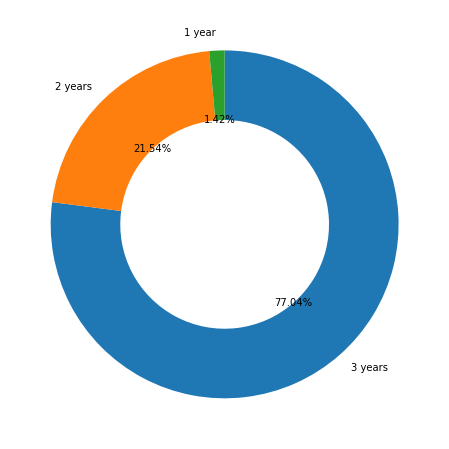

In [104]:
figure_size(8,8)
plt.pie(my_df['Term'].value_counts() ,labels = ['3 years' , '2 years' , '1 year']  ,startangle = 90 , autopct = '%1.2f%%', counterclock = False , wedgeprops = {'width': 0.4});

as I expected that most of loans are the longest term loans

### 6- Loan Original Amount distribution

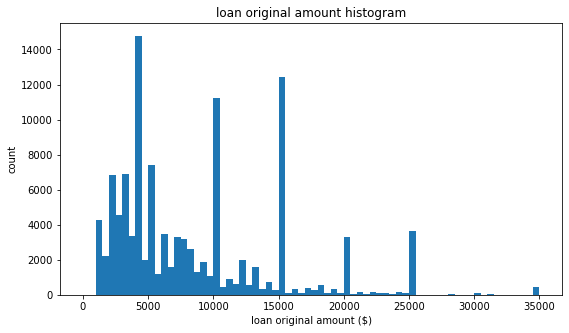

In [24]:
figure_size(9,5)
bins = np.arange(0,35500,500)
plt.hist(data = my_df , x = 'LoanOriginalAmount' , bins = bins);
plt.xlabel('loan original amount ($)')
plt.ylabel('count')
plt.title('loan original amount histogram');

we can see that we our distrubiton is right skewed and it's not useful to extract a useful insights so we will try to log scale it 

In [28]:
np.log10(my_df['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

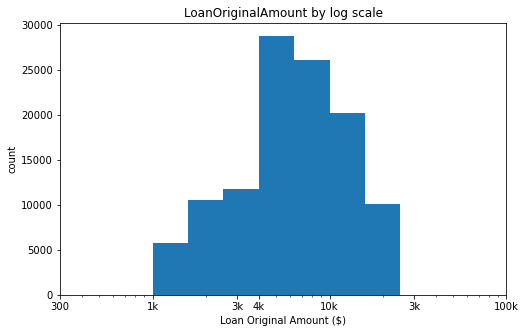

In [61]:
figure_size(8,5)
bins = 10 **np.arange(3,4.6,0.2)
plt.hist(my_df['LoanOriginalAmount'] , bins = bins);
plt.xscale('log');
plt.xticks([300, 1e3, 3e3 ,4e3, 1e4, 3e4, 1e5], ['300', '1k', '3k','4k', '10k', '3k' ,'100k']);
plt.title('LoanOriginalAmount by log scale');
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('count');

it seems that we have normal distribution  with hight streak between 4k and 10k &dollar;

### 7- MonthlyLoanPayment distribution

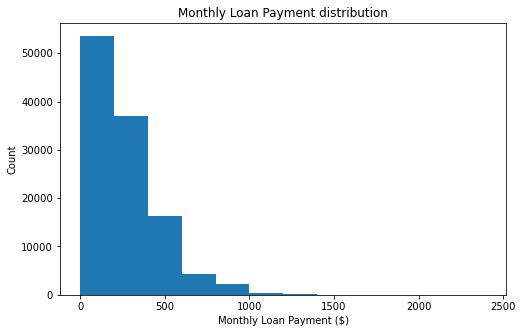

In [26]:
figure_size(8,5)
bins = np.arange(0,2500,200)
plt.hist(my_df['MonthlyLoanPayment'] ,bins = bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Count')
plt.title('Monthly Loan Payment distribution');

our distrubtion is so right skewed so we will try to do log scale transformation

In [27]:
np.log10(my_df['MonthlyLoanPayment'].describe())

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056665
mean     2.435328
std      2.284877
min          -inf
25%      2.119322
50%      2.337938
75%      2.570052
max      3.352474
Name: MonthlyLoanPayment, dtype: float64

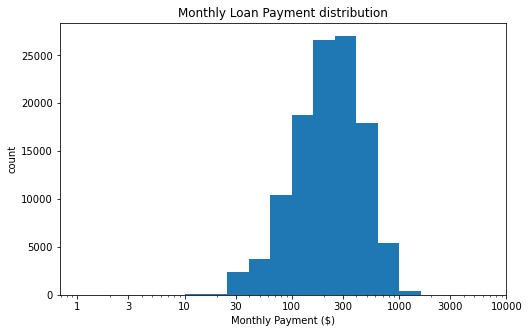

In [37]:
figure_size(8,5)
bins = 10**np.arange(0,3.4,0.2)
plt.hist(my_df['MonthlyLoanPayment'] , bins = bins)
plt.xscale('log')
tickslabels = [1,3,10,30,100,300,1000,3000,10000]
ticksnames= ['{}'.format(v) for v in tickslabels]
plt.xticks(tickslabels , ticksnames);
plt.xlabel('Monthly Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment distribution');

after doing log-scale we have found that monthly loan payment is slightly left skewed distribution with high peak in between 100 - 500 $ 

### 8- Investors Distribution

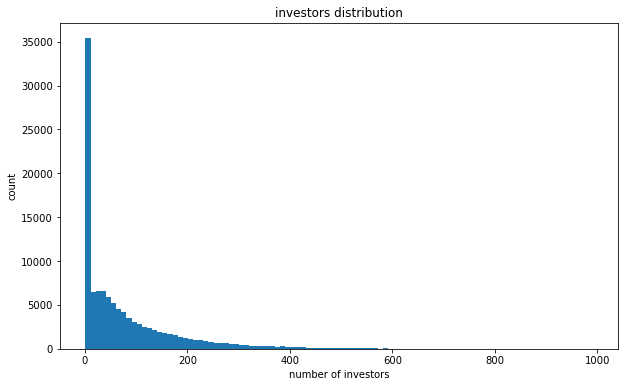

In [51]:
figure_size(10,6)
bins = np.arange(1,1000,10)
plt.hist(my_df['Investors'],bins = bins);
plt.xlabel('number of investors')
plt.ylabel('count')
plt.title('investors distribution');

From this histogram we figure that most of the loans have less than 10 investors and the distribution is right skewed so we will do log transformation to gain useful insights for the loans who have more than 10 investors

In [49]:
np.log10(my_df[my_df['Investors'] > 10].Investors.describe())

count    4.895102
mean     2.063913
std      2.029023
min      1.041393
25%      1.612784
50%      1.903090
75%      2.195900
max      3.075182
Name: Investors, dtype: float64

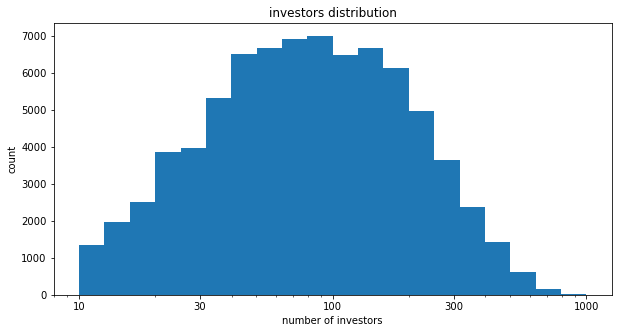

In [54]:
figure_size(10,5);
bins = 10 ** np.arange(1,3.1,0.1)
plt.hist(my_df[my_df['Investors'] > 10].Investors , bins = bins)
plt.xscale('log')
plt.xticks([10,30,100,300, 1e3], ['10', '30', '100', '300', '1000'])
plt.xlabel('number of investors')
plt.ylabel('count')
plt.title('investors distribution');

the distribution of the investors who are more than 10 are normally distributed with the high peak starts for about (35 - 250) investors 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? :
   - Loan Original Amount distribution was right skewed with many strikes and ramps so i looked at the data under the log tansformation , I have figured that the distribution was it seems that we have normal distribution  with hight streak between 4k and 10k &dollar;
   - Monthly loan payment  distribution was so right skewed so I looked to the data under the log transformation, and i have found that our data is slightly left skewed with high peak between (200 - 300) &dollar;


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- Investors distribution was right skewed with so high frequency of no. of investors who are less than 10 , so i did a log transformation and cleaned the data of the loans who have less than 10 investors to focus on the rest no. of investors of the loans 

## Bivariate Visualizations

#### Borrower rate vs listing category

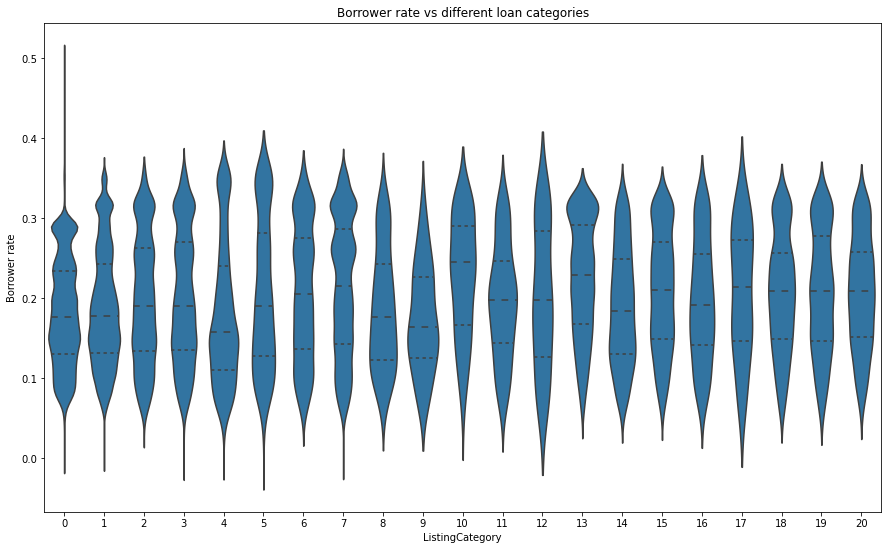

In [109]:
figure_size(15,9)
sb.violinplot(data = my_df, x = 'ListingCategory', y = 'BorrowerRate' , color = base_color , inner = 'quartile');
plt.title('Borrower rate vs different loan categories');
plt.ylabel('Borrower rate');

the highest Borrower rate is for the cosmetic prodcedures

#### Loan status vs Borrower rate

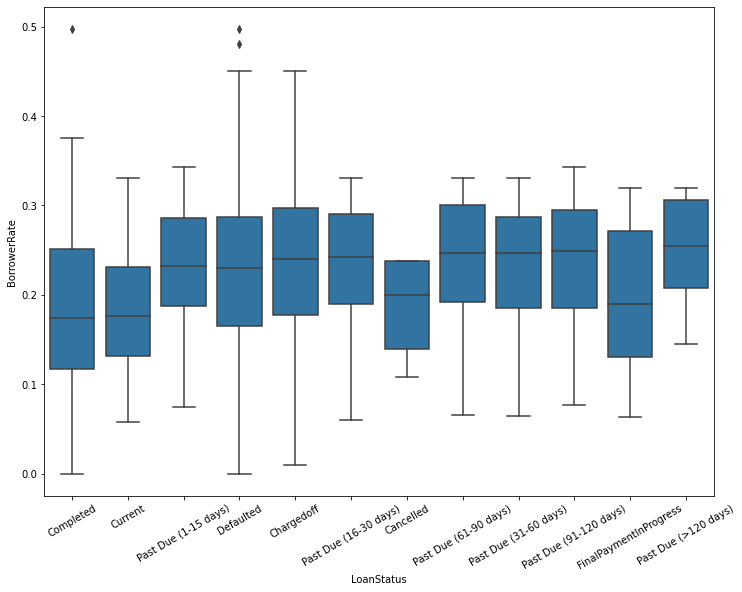

In [80]:
figure_size(12,9)
sb.boxplot(data = my_df, x = 'LoanStatus', y = 'BorrowerRate' , color = base_color);
plt.xticks(rotation = 30);

from the graph we find that the completed and current mean is less than any status

#### Borrower APR vs Employment status

In [108]:
figure_size(15,6)

sb.boxplot(data=my_df,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

we notice here that the Not employed have higher IQR thant the empolyed status 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>From the Borrower rate vs listing category graph we notice : 
1-the highest Borrower rate is for the cosmetic prodcedures
2-the lowest Borrower rate is for the 

> From the relation between EmploymentStatus and BorrowerAPR we found that people who are not employed receive high interest rate compared to the employed

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> the loans which have past dues statues have higher interest rate.

## Multivariate Exploration


#### BorrowerAPR vs ProsperScore vs LoanOriginalAmount

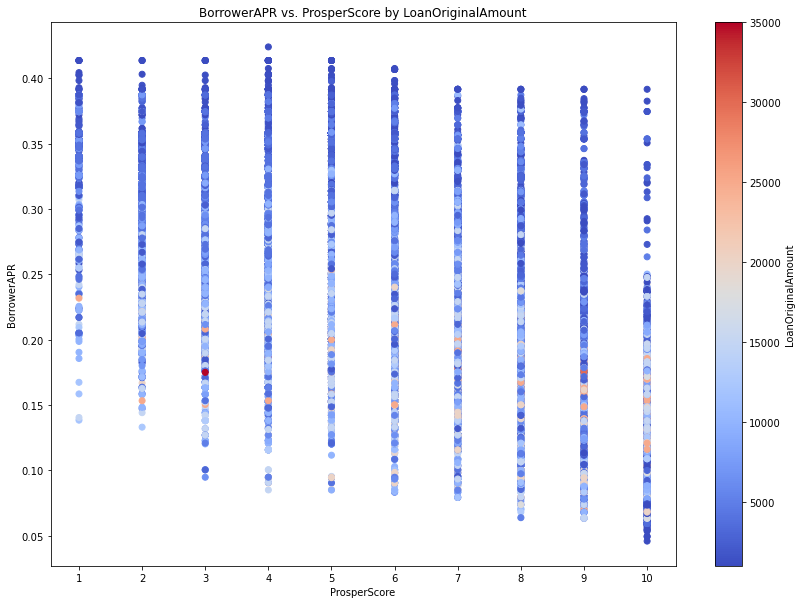

In [169]:
figure_size(14,10)
plt.scatter(data=my_df,x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount' , cmap = 'coolwarm') 
plt.colorbar(label = 'LoanOriginalAmount')
plt.xticks(np.arange(1,11,1))
plt.title('BorrowerAPR vs. ProsperScore by LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

we can notice that the higher prosper score the higher chance that the borrower can get higher amount of loan < ($20,000)

#### LenderYield vs Borrower APR  vs ProsperRating

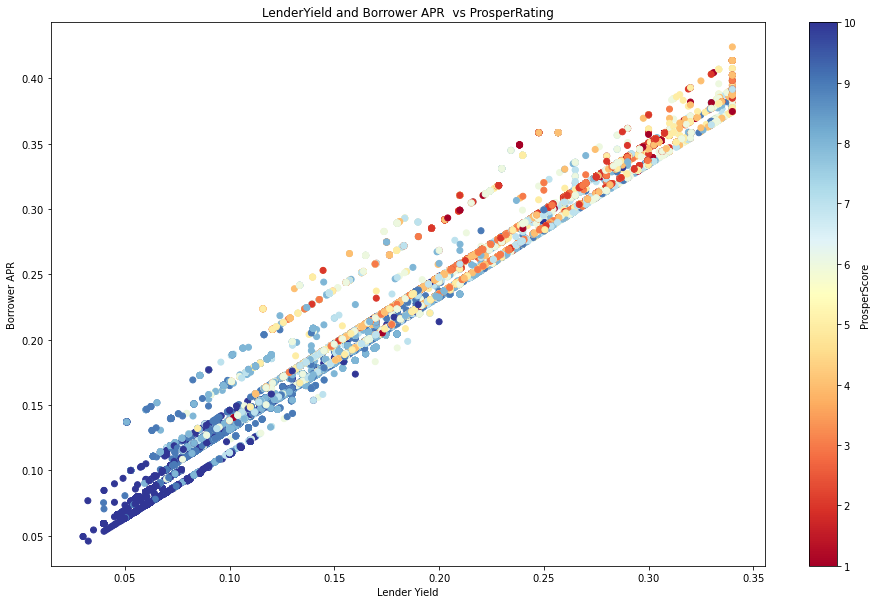

In [174]:
figure_size(16,10)
plt.scatter(data=my_df,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'RdYlBu')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield and Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

- A positive correlation between Lender Yield and Borrower APR
- A negative correlation between Lender Yield and Prosper Score
- A negative correlation between Borrower APR and Prosper Score

### BorrowerRate vs IsBorrowerHomeOwner over the years

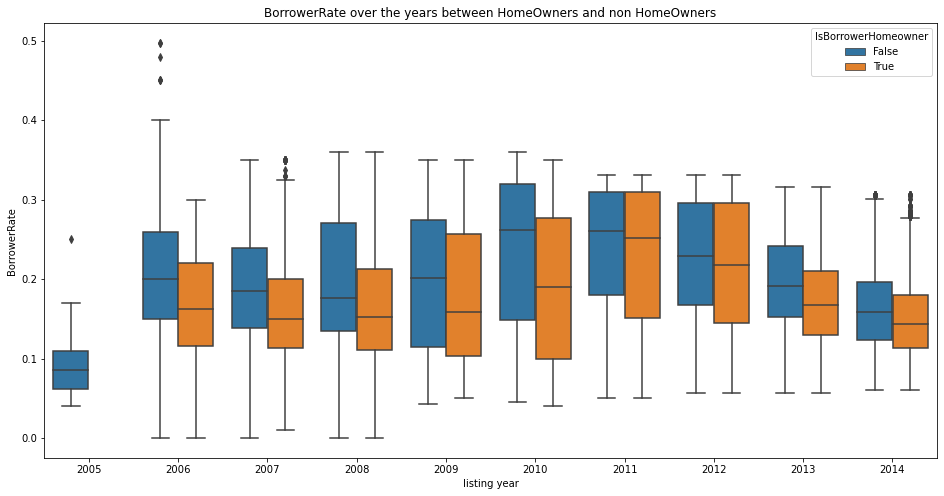

In [211]:
figure_size(16,8)
sb.boxplot(data=my_df, x='listing year', y='BorrowerRate', hue='IsBorrowerHomeowner');
plt.title('BorrowerRate over the years between HomeOwners and non HomeOwners');

the borrower rate increased for some years in case of non homeowners, however the peak was between (2010 - 2011) and it decreased after 2011. As regards of homeowners, there wasn't much difference till 2009 but after 2009, the graph went up till 2011 and started falling off from then.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> i have found some important correlations : 
   >> A positive correlation between Lender Yield and Borrower APR  
      A negative correlation between Lender Yield and Prosper Score  
     A negative correlation between Borrower APR and Prosper Score

In [ ]:
!jupyter nbconvert prosper-loan-exploratory-project.ipynb --to slides --post serve --no-input --no-prompt